In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,random_state=23,n_features=2)

In [4]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

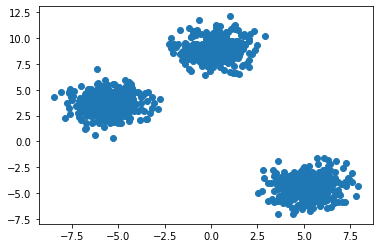

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Elbow method:

wcss=[]

for k in range(1,31):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
wcss

[41167.28340753899,
 9544.872623190906,
 1570.3723999827837,
 1356.5945869634127,
 1180.3173386284343,
 1016.2248549011364,
 906.2056719326947,
 805.1433550575273,
 697.4771225672721,
 644.7401524986694,
 585.4913383348166,
 541.9475275796995,
 507.6087463657686,
 474.4811948164856,
 447.96675445251697,
 422.1233486002612,
 397.1704261025464,
 381.0061504169204,
 357.8479962821491,
 345.5741686072186,
 331.6197549562878,
 312.2263381234811,
 297.43369499107064,
 287.806691359237,
 274.0742291051677,
 269.4559729737917,
 253.6978414925677,
 245.63209793233926,
 235.53064194061446,
 227.5346293683384]

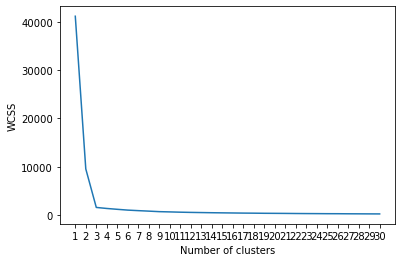

In [11]:
plt.plot(range(1,31),wcss)
plt.xticks(range(1,31))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [13]:
y_labels=kmeans.fit_predict(X_train)

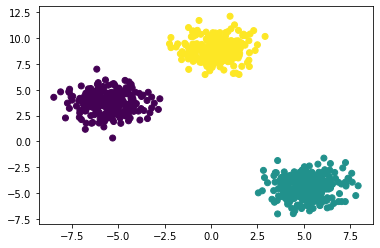

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [15]:
!pip install Kneed

In [16]:
from kneed import KneeLocator

In [17]:
kl =KneeLocator(range(1,31),wcss,curve='convex',direction='decreasing')

In [18]:
kl.elbow

3

In [19]:
from sklearn.metrics import silhouette_score


silhouette_coeff=[]

for k in range(2,31):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coeff.append(score)

In [20]:
silhouette_coeff

[0.7258310358179207,
 0.8068049253852778,
 0.6386021637081094,
 0.490836972271789,
 0.33662835164715443,
 0.330786603107062,
 0.34338938421825005,
 0.3419744415999517,
 0.3393317981541514,
 0.3333409861783271,
 0.32492248074470337,
 0.3281011729095379,
 0.31776535822773766,
 0.326002992809842,
 0.33010917803830536,
 0.324263747108547,
 0.33239189038974304,
 0.33009288321959557,
 0.33760598088651406,
 0.33359899665391296,
 0.34157553411622543,
 0.3363517112781293,
 0.33523253630412925,
 0.33444869853996173,
 0.3403655579826382,
 0.33086567958983737,
 0.331539759103777,
 0.3387435275302866,
 0.34292860820014065]

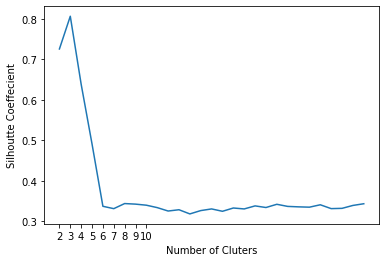

In [21]:
plt.plot(range(2,31),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [22]:
from sklearn import datasets
iris=datasets.load_iris()

In [23]:
iris_data=pd.DataFrame(iris.data)

In [24]:
iris_data.columns=iris.feature_names

In [25]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_scaled=scaler.fit_transform(iris_data)

In [28]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [29]:
X_scaled.shape

(150, 4)

In [30]:
# apply PCA:

from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=2)

In [32]:
pca_scaled=pca.fit_transform(X_scaled)

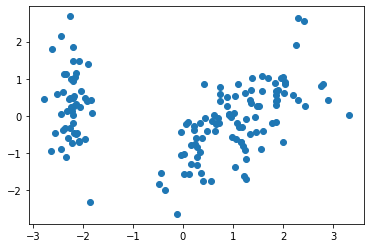

In [33]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

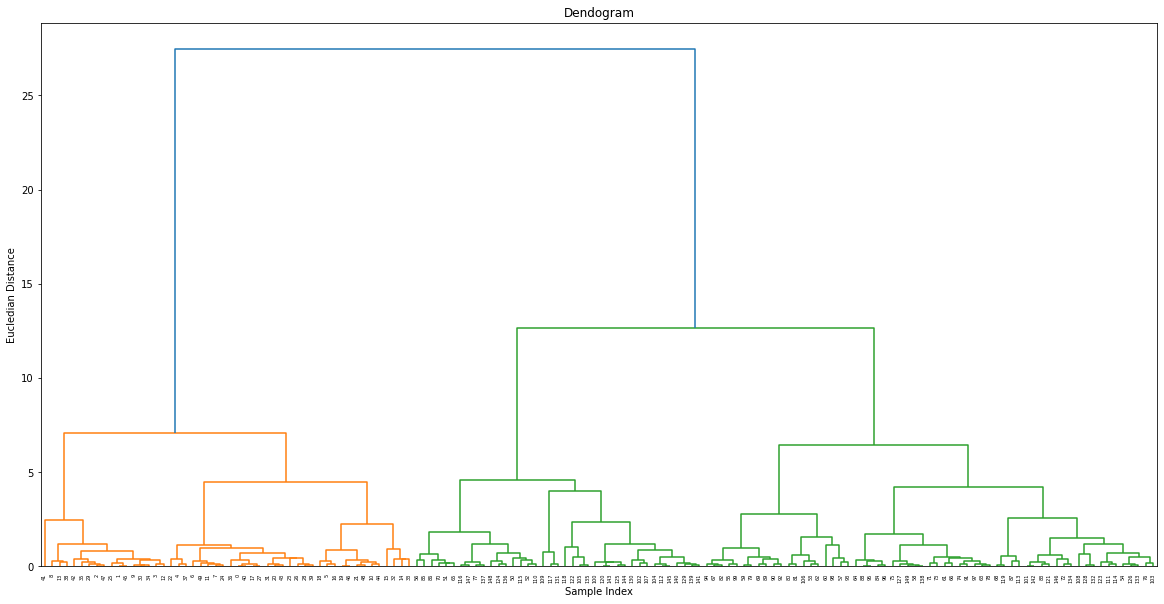

In [34]:
# Agglomerative Clustering:
# Dendogram:

import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,10))
plt.title('Dendogram')
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [36]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

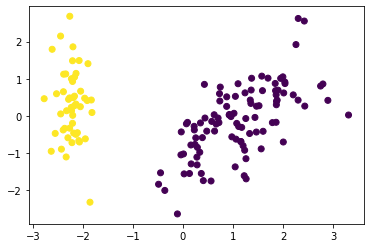

In [37]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients=[]
for k in range(2, 11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

In [40]:
silhouette_coefficients

[0.5770346019475988,
 0.446689041028591,
 0.4006363159855974,
 0.33058726295230545,
 0.3148548010051283,
 0.31696983029912795,
 0.31094652900725794,
 0.3114342247547166,
 0.3161120375980681]

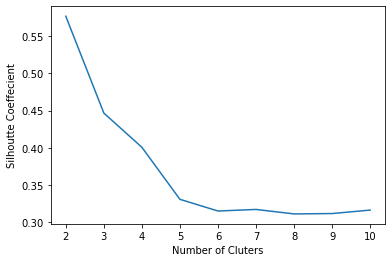

In [41]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [4]:
x,y=make_moons(n_samples=250,noise=0.05)

In [5]:
x

array([[ 1.45549868e+00, -4.25393386e-01],
       [ 2.10781744e+00,  4.36364528e-01],
       [ 2.24777203e-01,  1.03155921e+00],
       [-4.74810883e-02,  1.11275297e+00],
       [ 7.53686006e-01, -4.26949297e-01],
       [ 4.37634749e-01,  8.35587722e-01],
       [ 1.91795745e+00,  1.65201814e-02],
       [ 1.27678415e+00, -4.81573691e-01],
       [ 7.63052719e-01,  7.87534324e-01],
       [ 1.69580126e+00, -1.58690271e-01],
       [ 1.07024976e+00,  6.31472831e-03],
       [-8.00556664e-02,  9.49761521e-01],
       [ 4.76223309e-01,  8.74961269e-01],
       [-7.38023516e-01,  6.52264624e-01],
       [ 9.68838601e-01,  7.38947932e-02],
       [ 8.27320216e-01, -4.48248311e-01],
       [ 1.12403566e+00, -4.43739535e-01],
       [-7.99910743e-01,  7.44780186e-01],
       [ 2.76657408e-01,  9.32732632e-01],
       [-8.77050968e-01,  3.44937429e-01],
       [ 1.05995988e+00,  2.21067275e-01],
       [-9.20673840e-01,  4.28453961e-01],
       [ 1.89710396e+00,  2.81185711e-02],
       [-4.

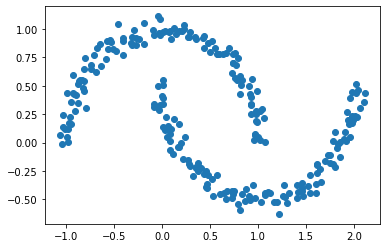

In [6]:
plt.scatter(x[:,0],x[:,1])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_scaled=scaler.fit_transform(x)

In [9]:
dbscan=DBSCAN(eps=0.35)

In [10]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.35)

In [11]:
dbscan.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

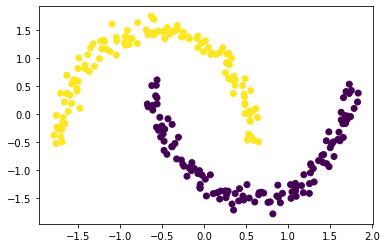

In [12]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbscan.labels_)